In [1]:
!pip install -q scikit-learn matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(4, 10)     # Hidden layer with 10 neurons
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 3)     # 3 output classes

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

In [6]:
model = MLP()

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
epochs = 100
train_loss = []
train_accuracy = []

In [9]:
for epoch in range(epochs):
    model.train()


    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [11]:
_, predicted = torch.max(outputs.data, 1)
acc = (predicted == y_train_tensor).sum().item() / y_train_tensor.size(0)

train_loss.append(loss.item())
train_accuracy.append(acc)

if (epoch+1) % 10 == 0:
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")


Epoch 100/100, Loss: 0.0894, Accuracy: 0.9667


In [12]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted_test = torch.max(test_outputs.data, 1)

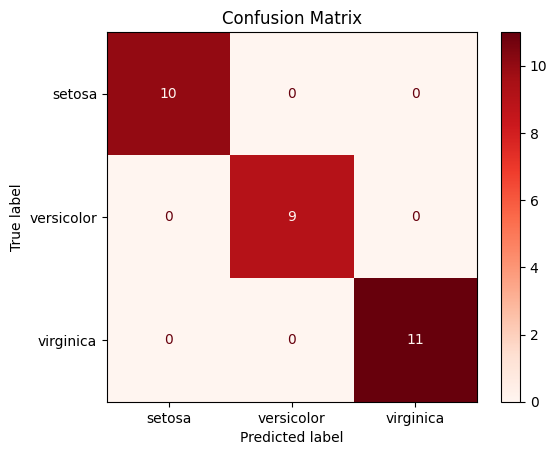

In [16]:
cm = confusion_matrix(y_test_tensor, predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()


In [14]:
print("Classification Report:\n")
print(classification_report(y_test_tensor, predicted_test, target_names=iris.target_names))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



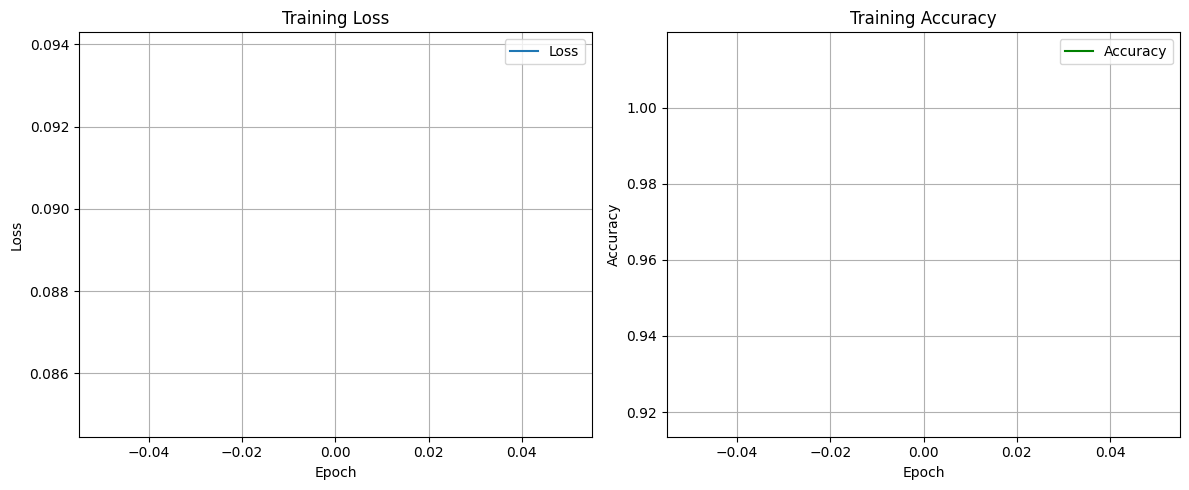

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()